 데이터 불러오기

데이터 참고 사이트
모기데이터: http://data.seoul.go.kr/dataList/OA-13285/S/1/datasetView.do
날씨데이터: https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
미세먼지데이터: http://data.seoul.go.kr/dataList/OA-2220/S/1/datasetView.do

In [1]:
#필요한 라이브러리 import 하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#경고 출력되지 않게 하기
import warnings
warnings.filterwarnings("ignore")

In [3]:
#주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [4]:
#운영체제별 한글 폰트 설정

import platform
import matplotlib.font_manager as fm

# 운영체제별 한글 폰트 설정

if platform.system() == 'Windows': 
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False


모기지수 데이터 불러오기+ 전처리

In [61]:
#모기 지수 데이터 불러오기
mos_data=pd.read_csv("서울시 모기예보제 정보.csv", encoding='cp949')

In [62]:
#모기 지수 데이터 살펴보기
mos_data.head()
mos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수 발생일   4596 non-null   object 
 1   모기지수(수변부)  4584 non-null   float64
 2   모기지수(주거지)  4584 non-null   float64
 3   모기지수(공원)   4584 non-null   float64
dtypes: float64(3), object(1)
memory usage: 143.8+ KB


In [7]:
#모기지수 발생일 datetime으로 바꾸기
mos_data['모기지수 발생일'] = pd.to_datetime(mos_data['모기지수 발생일'])

In [8]:
#모기지수 null값 제거하기

import datetime as dt

#1970년 데이터 제거하기
mos_data_1=mos_data[(mos_data['모기지수 발생일']=='1970-01-01')].index 
mos_data=mos_data.drop(mos_data_1)

기상청 데이터 가져오기+ 전처리

In [10]:
#기상청 데이터 가져오기
weather_data=pd.read_csv("OBS_ASOS_DD_20210514164530.csv", encoding='cp949')

In [11]:
#기상청 데이터 살펴보기
#weather_data.head()
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지점            1839 non-null   int64  
 1   지점명           1839 non-null   object 
 2   일시            1839 non-null   object 
 3   평균기온(°C)      1839 non-null   float64
 4   일강수량(mm)      719 non-null    float64
 5   평균 풍속(m/s)    1836 non-null   float64
 6   평균 상대습도(%)    1839 non-null   float64
 7   평균 전운량(1/10)  1839 non-null   float64
 8   평균 지면온도(°C)   1839 non-null   float64
 9   안개 계속시간(hr)   28 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 143.8+ KB


In [12]:
#날씨데이터 측정일자 시계열 데이터로 바꾸기
weather_data['일시'] = pd.to_datetime(weather_data['일시'])

#필요 없는 데이터 지우기
weather_data.drop(columns=weather_data.columns[[0,1,9]],inplace=True)

대기환경 데이터 가져오기 + 전처리

In [13]:
#대기환경 관련 데이터 가져오기
#2016년 2017년 데이터 scv로 변환
air_data1=pd.read_excel("기간별_일평균_대기환경_정보_2016년.xlsx")
air_data1.to_csv("기간별_일평균_대기환경_정보_2016년.csv")
air_data2=pd.read_excel("기간별_일평균_대기환경_정보_2017년.xlsx")
air_data2.to_csv("기간별_일평균_대기환경_정보_2017년.csv")
air_data3=pd.read_csv("기간별_일평균_대기환경_정보_2018년.csv", encoding='cp949')
air_data4=pd.read_csv("기간별_일평균_대기환경_정보_2019년.csv", encoding='cp949')

In [14]:
#대기환경 데이터 살펴보기
print(air_data1.head())
print(air_data2.head())
print(air_data3.head())
print(air_data4.head())

       측정일자  권역명 측정소명  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)  오존(ppm)  이산화질소농도(ppm)  \
0  20160101  동북권  광진구         85          64    0.004         0.046   
1  20160101  동남권  강남구         73          44    0.006         0.047   
2  20160101  서남권  강서구         66          38    0.005         0.048   
3  20160101  서남권  구로구         56          41    0.007         0.038   
4  20160101  동북권  성북구         71          45    0.005         0.056   

   일산화탄소농도(ppm)  아황산가스농도(ppm)  
0           0.9         0.006  
1           0.8         0.006  
2           0.9         0.006  
3           1.1         0.007  
4           1.3         0.007  
       측정일자  권역명  측정소명  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)  오존(ppm)  이산화질소농도(ppm)  \
0  20170101  도심권    중구         81          64    0.003         0.057   
1  20170101  도심권   용산구         77          73    0.003         0.039   
2  20170101  도심권   종로구         82          67    0.003         0.054   
3  20170101  서북권  서대문구         91          50    0.008         0.039   
4  20170101  서북권   은평

In [15]:
#데이터 타입 살펴보기
air_data1.info()
air_data2.info()
air_data3.info()
air_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9148 entries, 0 to 9147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일자          9148 non-null   int64  
 1   권역명           9148 non-null   object 
 2   측정소명          9148 non-null   object 
 3   미세먼지(㎍/㎥)     9148 non-null   int64  
 4   초미세먼지(㎍/㎥)    9148 non-null   int64  
 5   오존(ppm)       9148 non-null   float64
 6   이산화질소농도(ppm)  9148 non-null   float64
 7   일산화탄소농도(ppm)  9148 non-null   float64
 8   아황산가스농도(ppm)  9148 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 643.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일자          9125 non-null   int64  
 1   권역명           9125 non-null   object 
 2   측정소명          9125 non-null   object 
 3   미세먼지(㎍/㎥)     9125 non-null   i

In [16]:
#측정일자 기준으로 관측치 더해서 평균 구하기(1)
#데이터에서 '측정일자' 시계열로 데이터 타입 바꾸기

import datetime

air_data1['측정일자']= air_data1['측정일자'].astype('str')
air_data2['측정일자']= air_data2['측정일자'].astype('str')
air_data3['측정일자']= air_data3['측정일자'].astype('str')
air_data4['측정일자']= air_data4['측정일자'].astype('str')

air_data1['측정일자'] = pd.to_datetime(air_data1['측정일자'])
air_data2['측정일자'] = pd.to_datetime(air_data2['측정일자'])
air_data3['측정일자'] = pd.to_datetime(air_data3['측정일자'])
air_data4['측정일자'] = pd.to_datetime(air_data4['측정일자'])

In [17]:
#측정일자 기준으로 관측치 더해서 평균 구하기(2)
#불필요한 변수들 제거

air_data1.drop(columns=air_data1.columns[[1,2,5,6,7,8]],inplace=True)
air_data2.drop(columns=air_data2.columns[[1,2,5,6,7,8]],inplace=True)
air_data3.drop(columns=air_data3.columns[[1,2,3,4,7,8,9,10]],inplace=True)
air_data4.drop(columns=air_data4.columns[[1,2,3,4,6,7,8,9]],inplace=True)

In [18]:
#측정일자 기준으로 관측치 더해서 평균 구하기(3)
#날짜별로 묶어서 평균 구하기

air_data1=air_data1.groupby('측정일자').mean()
air_data2=air_data2.groupby('측정일자').mean()
air_data3=air_data3.groupby('측정일자').mean()
air_data4=air_data4.groupby('측정일자').mean()

In [19]:
#데이터 다시 한번 확인해보기

print(air_data1.head())
print(air_data2.head())
print(air_data3.head())
print(air_data4.head())

            미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
측정일자                             
2016-01-01      68.36       44.64
2016-01-02      51.40       31.36
2016-01-03      88.40       58.12
2016-01-04      74.20       46.92
2016-01-05      32.20       16.36
            미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
측정일자                             
2017-01-01      77.32       56.84
2017-01-02     110.40       78.56
2017-01-03      78.52       51.52
2017-01-04      54.92       34.52
2017-01-05      36.40       22.16
            미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
측정일자                             
2018-01-01      38.56       20.12
2018-01-02      39.12       21.88
2018-01-03      33.88       18.24
2018-01-04      43.88       23.84
2018-01-05      55.72       35.60
            미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
측정일자                             
2019-01-01      39.36     0.00428
2019-01-02      33.08     0.00464
2019-01-03      38.80     0.00504
2019-01-04      59.44     0.00600
2019-01-05      65.72     0.00512


In [20]:
#2016년-2019년 데이터 병합하기
air_data=pd.concat([air_data1,air_data2,air_data3,air_data4])
air_data = air_data.rename_axis('index').reset_index()
#확인
air_data.head()
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       1392 non-null   datetime64[ns]
 1   미세먼지(㎍/㎥)   1392 non-null   float64       
 2   초미세먼지(㎍/㎥)  1392 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 32.8 KB


데이터 병합하기

In [21]:
#데이터 병합하기(1)
#날짜를 다시 str로 바꿔서 기준으로 맞추기
mos_data['모기지수 발생일']= mos_data['모기지수 발생일'].astype('str')
weather_data['일시']= weather_data['일시'].astype('str')
air_data['index']= air_data['index'].astype('str')

In [22]:
#데이터 병합하기(2)
#merge 이용해서 병합
from pandas import merge
data=merge(mos_data,weather_data,left_on="모기지수 발생일",right_on="일시")
data=merge(data,air_data,left_on="모기지수 발생일",right_on="index")

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   모기지수 발생일      1247 non-null   object 
 1   모기지수(수변부)     1244 non-null   float64
 2   모기지수(주거지)     1244 non-null   float64
 3   모기지수(공원)      1244 non-null   float64
 4   일시            1247 non-null   object 
 5   평균기온(°C)      1247 non-null   float64
 6   일강수량(mm)      483 non-null    float64
 7   평균 풍속(m/s)    1244 non-null   float64
 8   평균 상대습도(%)    1247 non-null   float64
 9   평균 전운량(1/10)  1247 non-null   float64
 10  평균 지면온도(°C)   1247 non-null   float64
 11  index         1247 non-null   object 
 12  미세먼지(㎍/㎥)     1247 non-null   float64
 13  초미세먼지(㎍/㎥)    1247 non-null   float64
dtypes: float64(11), object(3)
memory usage: 146.1+ KB


In [23]:
#data 정리하기
data.drop(columns=data.columns[[4,11]],inplace=True)
data.rename(columns={"모기지수 발생일":"날짜"},inplace=True)
data['날짜'] = pd.to_datetime(data['날짜'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   날짜            1247 non-null   datetime64[ns]
 1   모기지수(수변부)     1244 non-null   float64       
 2   모기지수(주거지)     1244 non-null   float64       
 3   모기지수(공원)      1244 non-null   float64       
 4   평균기온(°C)      1247 non-null   float64       
 5   일강수량(mm)      483 non-null    float64       
 6   평균 풍속(m/s)    1244 non-null   float64       
 7   평균 상대습도(%)    1247 non-null   float64       
 8   평균 전운량(1/10)  1247 non-null   float64       
 9   평균 지면온도(°C)   1247 non-null   float64       
 10  미세먼지(㎍/㎥)     1247 non-null   float64       
 11  초미세먼지(㎍/㎥)    1247 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 126.6 KB


데이터 시각화 하기

<IPython.core.display.Javascript object>


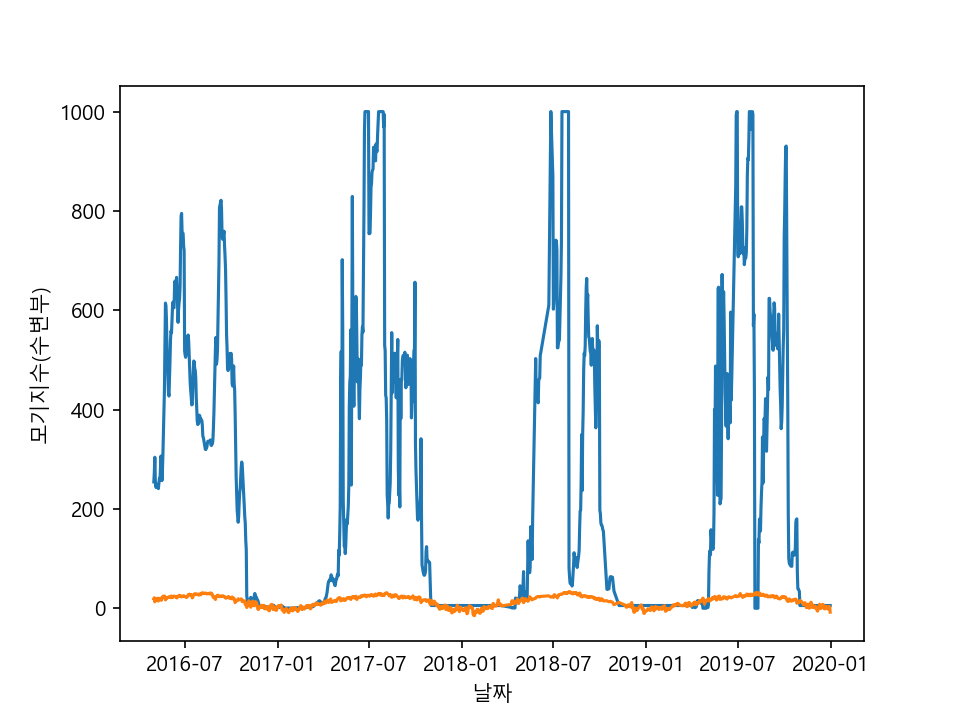

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

In [32]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.lineplot(data=data, x="날짜",y="평균기온(°C)")

<IPython.core.display.Javascript object>


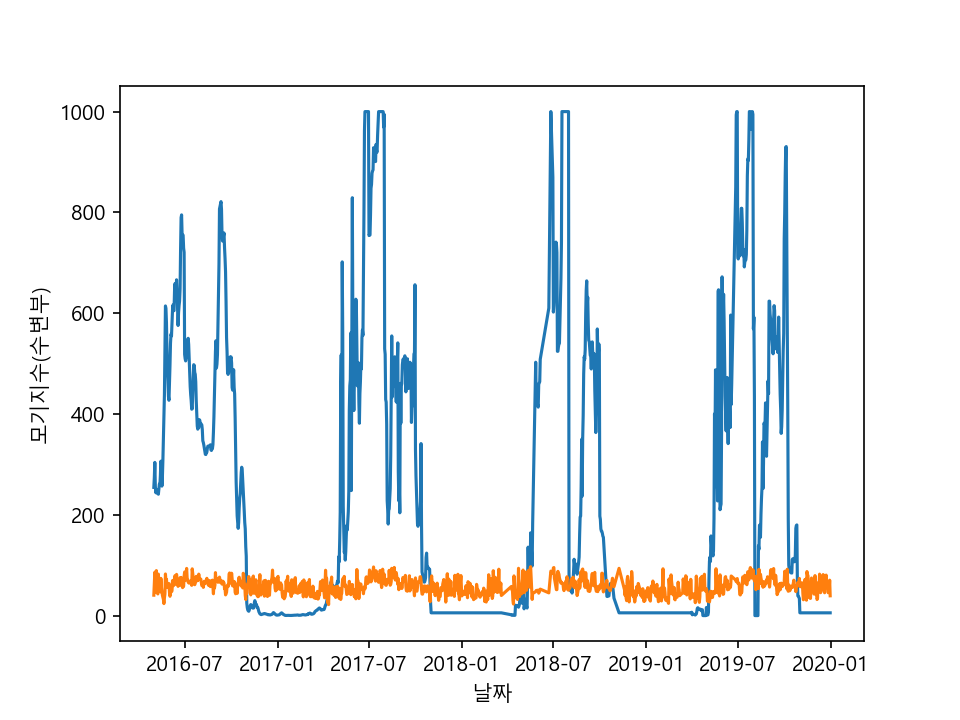

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

In [33]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.lineplot(data=data, x="날짜",y="평균 상대습도(%)")

In [34]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.lineplot(data=data, x="날짜",y="미세먼지(㎍/㎥)")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

<IPython.core.display.Javascript object>


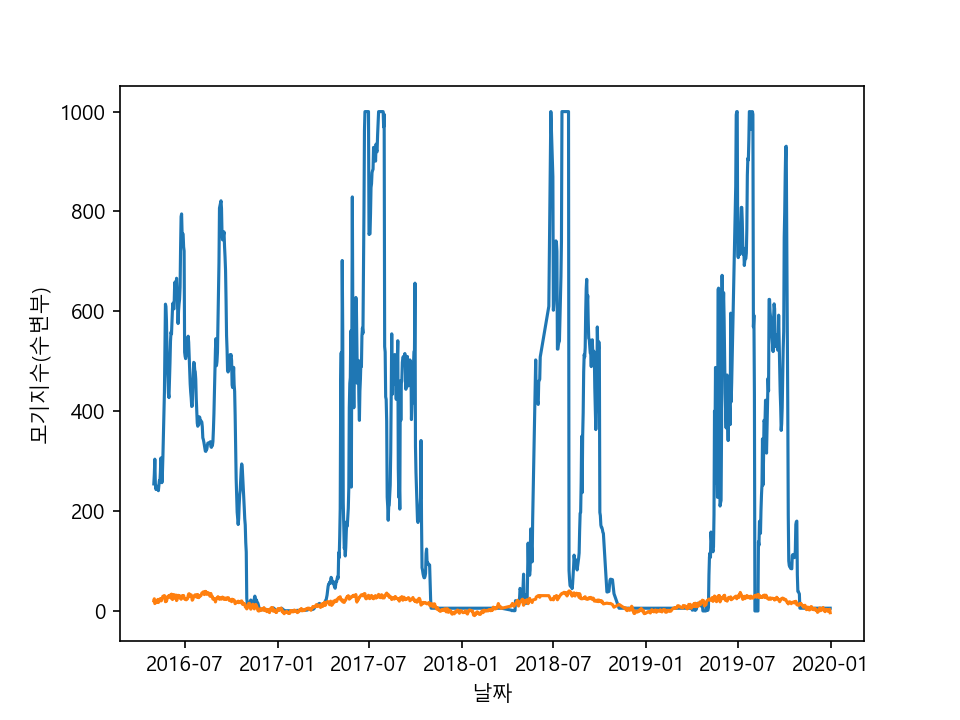

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

In [37]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.lineplot(data=data, x="날짜",y="평균 지면온도(°C)")

<IPython.core.display.Javascript object>


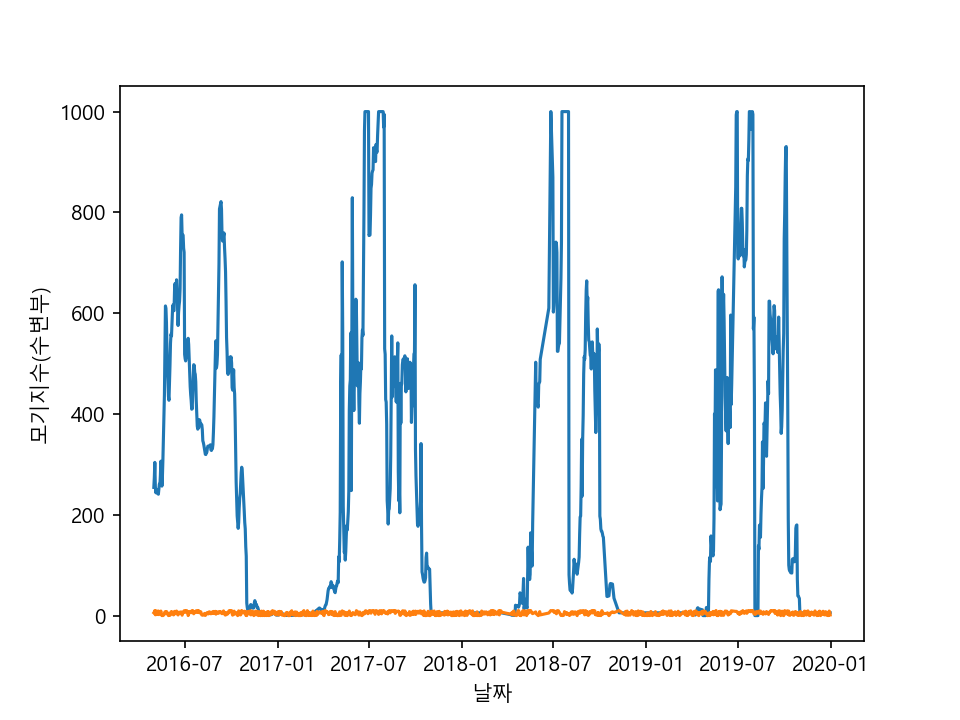

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

In [41]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.lineplot(data=data, x="날짜",y="평균 전운량(1/10)")

<IPython.core.display.Javascript object>


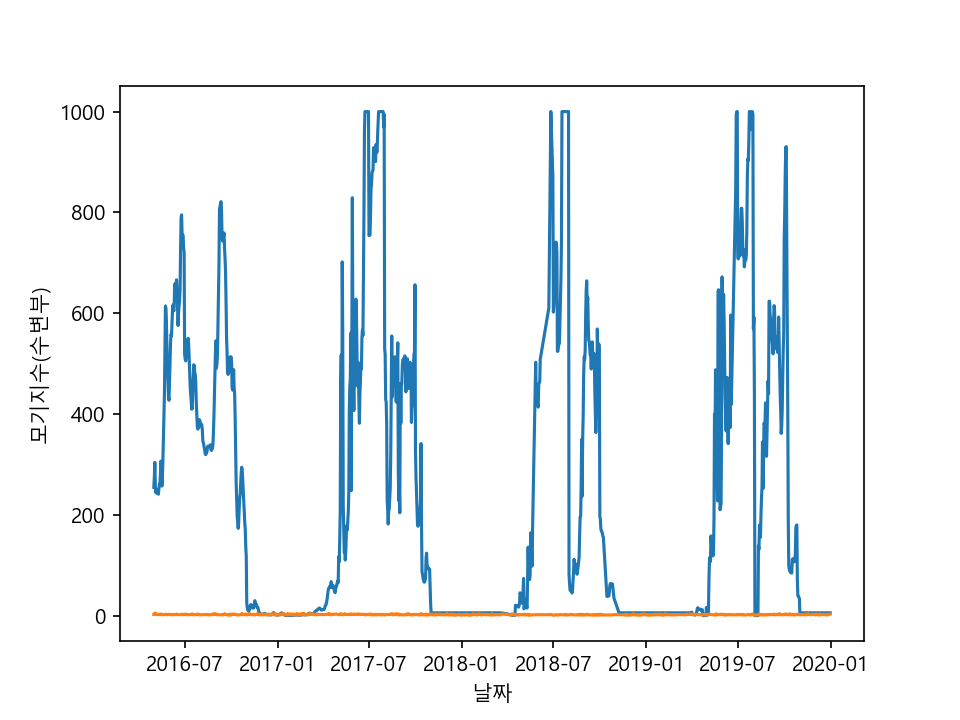

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

In [40]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.lineplot(data=data, x="날짜",y="평균 풍속(m/s)")

<IPython.core.display.Javascript object>


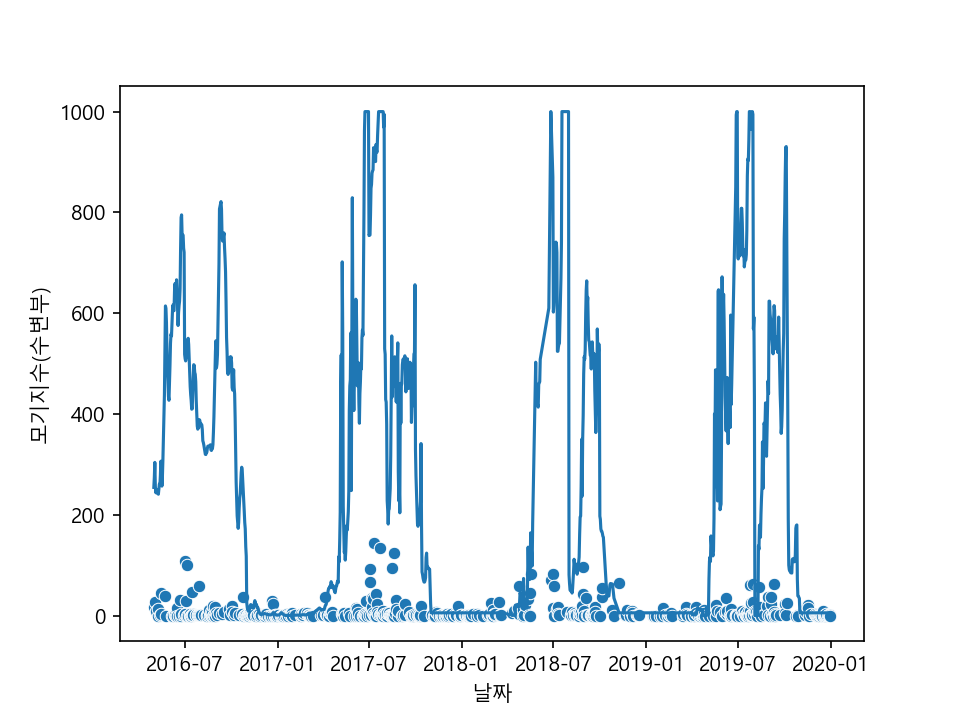

<AxesSubplot:xlabel='날짜', ylabel='모기지수(수변부)'>

In [42]:
sns.lineplot(data=data, x="날짜",y="모기지수(수변부)")
sns.scatterplot(data=data, x="날짜",y="일강수량(mm)")

<IPython.core.display.Javascript object>


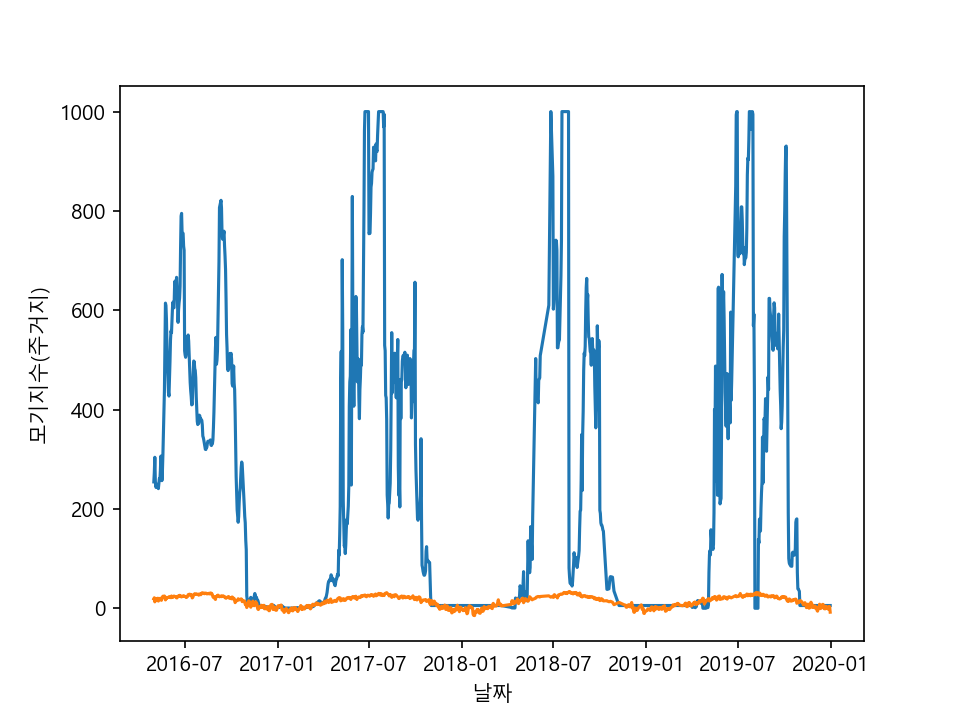

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

In [43]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.lineplot(data=data, x="날짜",y="평균기온(°C)")

<IPython.core.display.Javascript object>


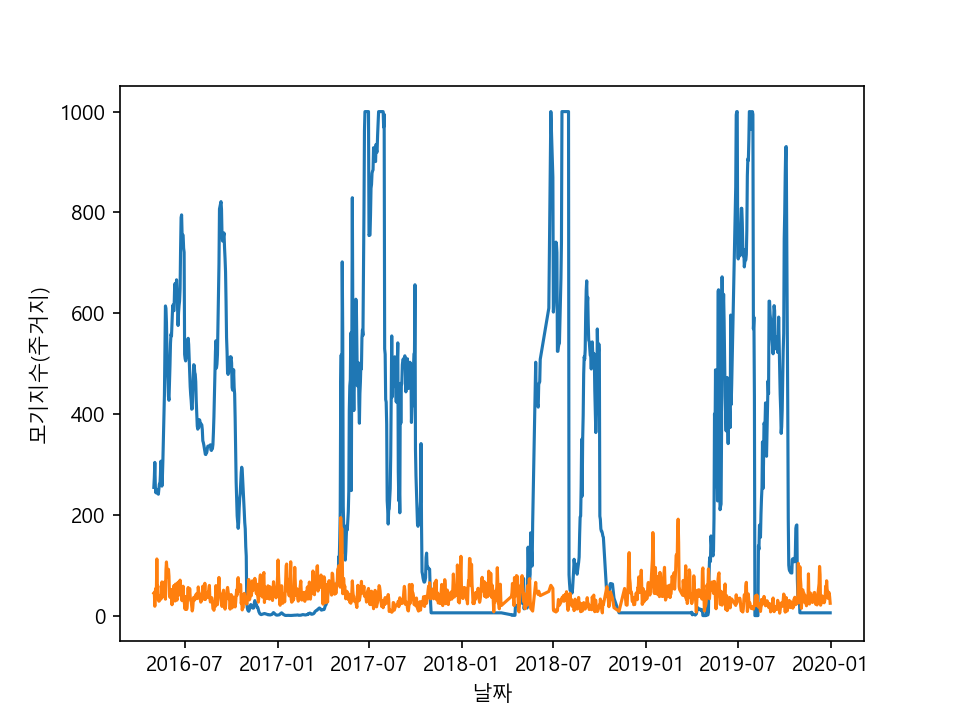

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

In [55]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.lineplot(data=data, x="날짜",y="미세먼지(㎍/㎥)")

<IPython.core.display.Javascript object>


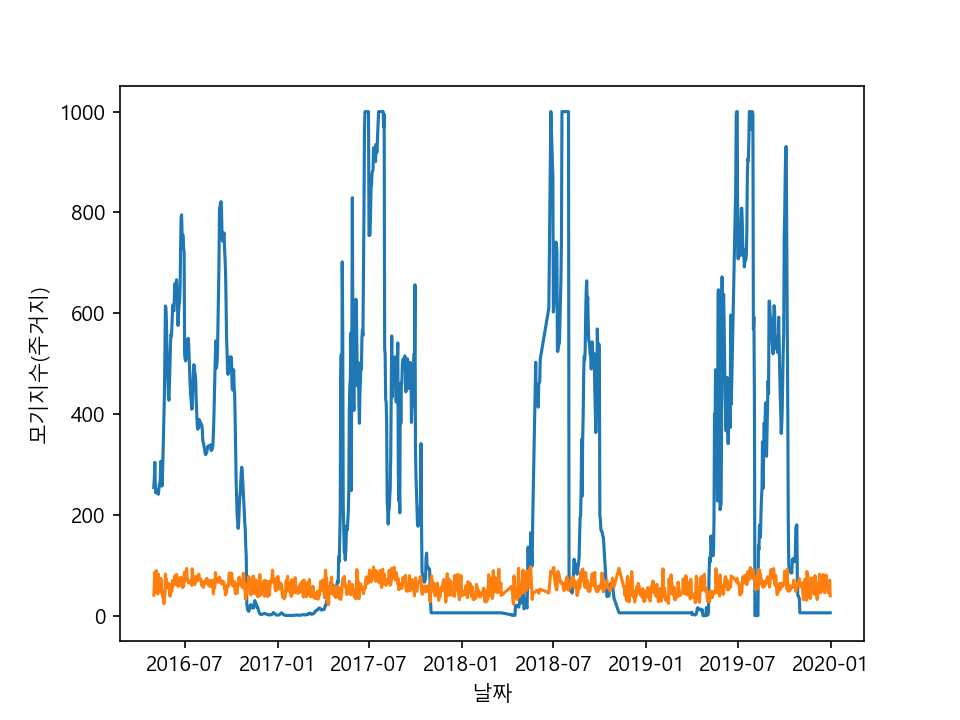

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

In [44]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.lineplot(data=data, x="날짜",y="평균 상대습도(%)")

<IPython.core.display.Javascript object>


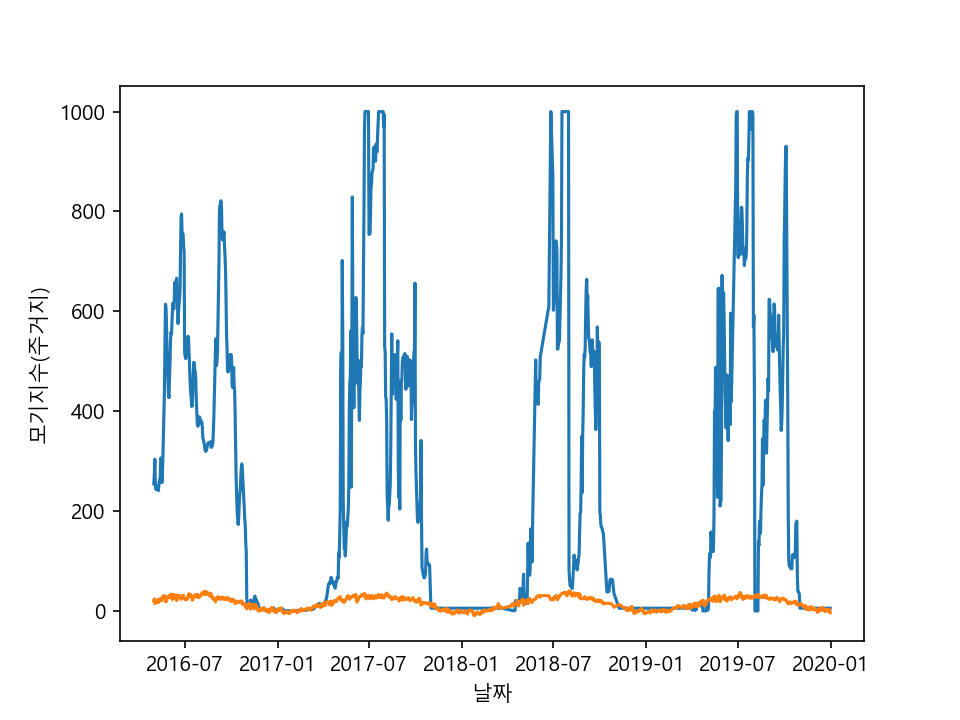

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

In [45]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.lineplot(data=data, x="날짜",y="평균 지면온도(°C)")

<IPython.core.display.Javascript object>


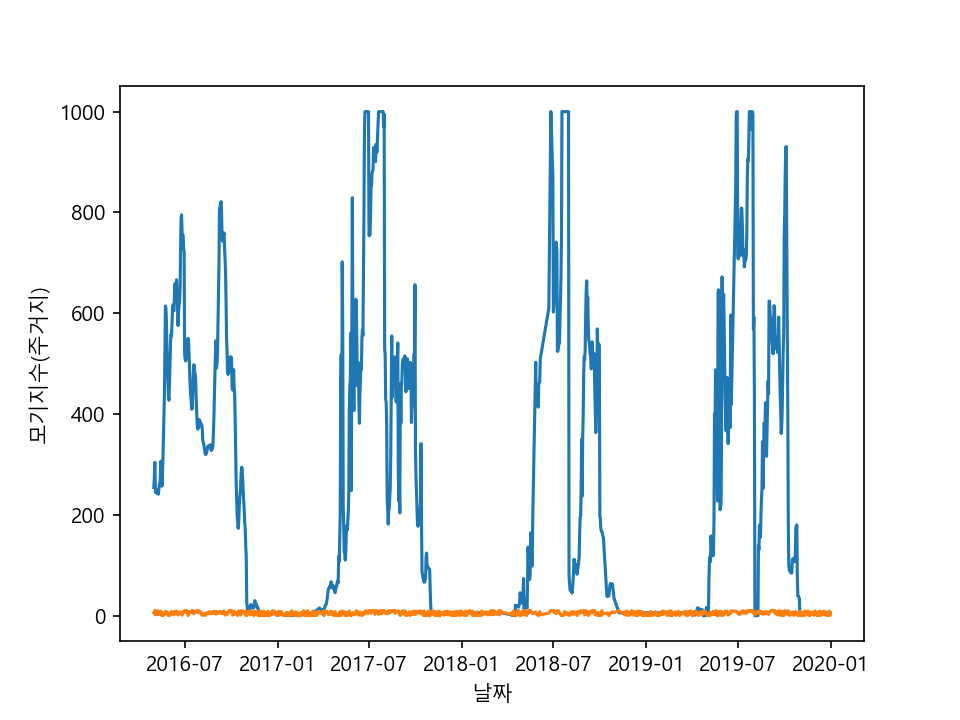

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

In [46]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.lineplot(data=data, x="날짜",y="평균 전운량(1/10)")

In [47]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.lineplot(data=data, x="날짜",y="평균 풍속(m/s)")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

<IPython.core.display.Javascript object>


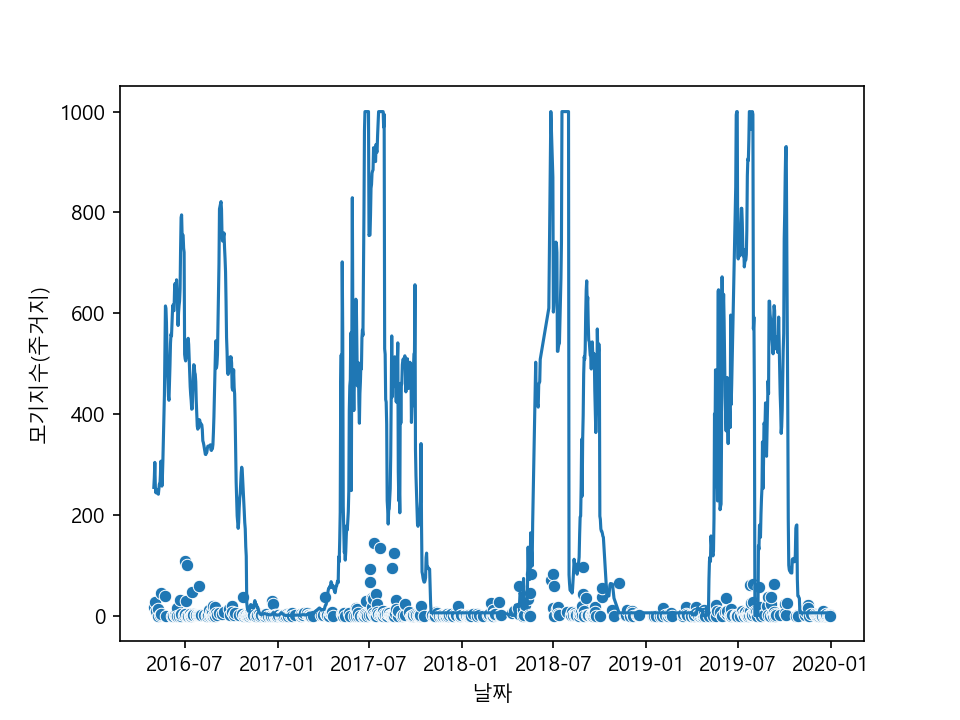

<AxesSubplot:xlabel='날짜', ylabel='모기지수(주거지)'>

In [48]:
sns.lineplot(data=data, x="날짜",y="모기지수(주거지)")
sns.scatterplot(data=data, x="날짜",y="일강수량(mm)")

<IPython.core.display.Javascript object>


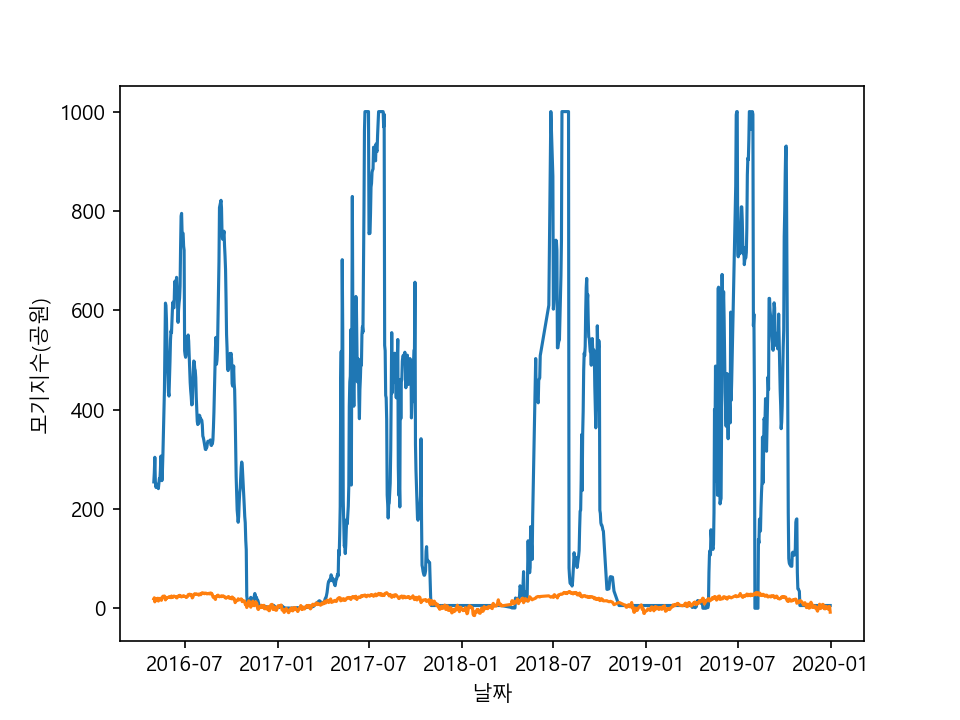

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>

In [49]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.lineplot(data=data, x="날짜",y="평균기온(°C)")

<IPython.core.display.Javascript object>


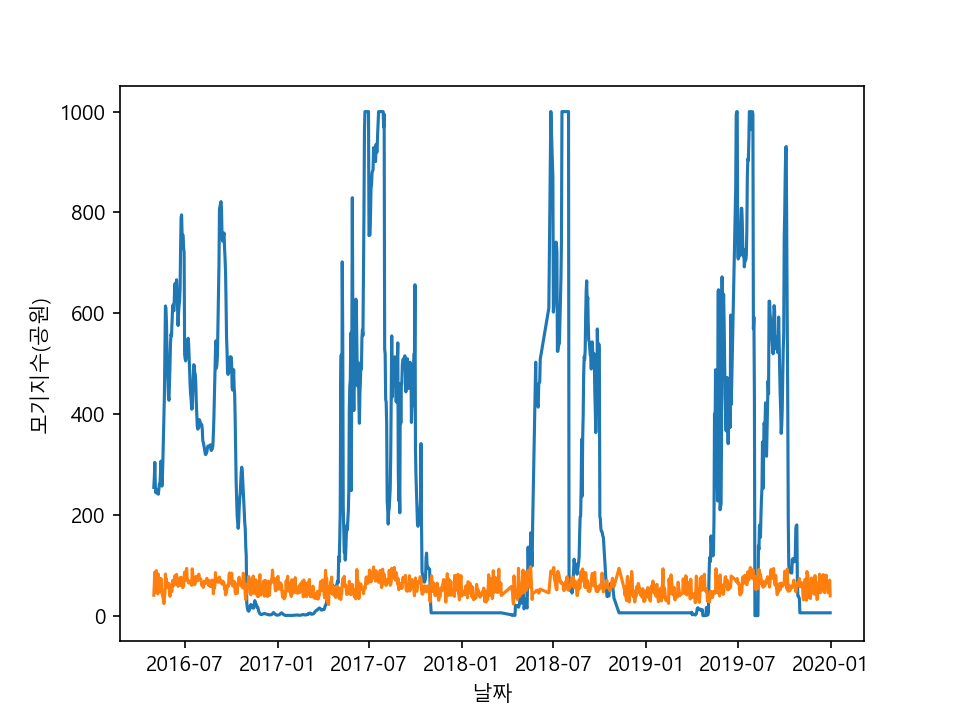

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>

In [50]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.lineplot(data=data, x="날짜",y="평균 상대습도(%)")

<IPython.core.display.Javascript object>


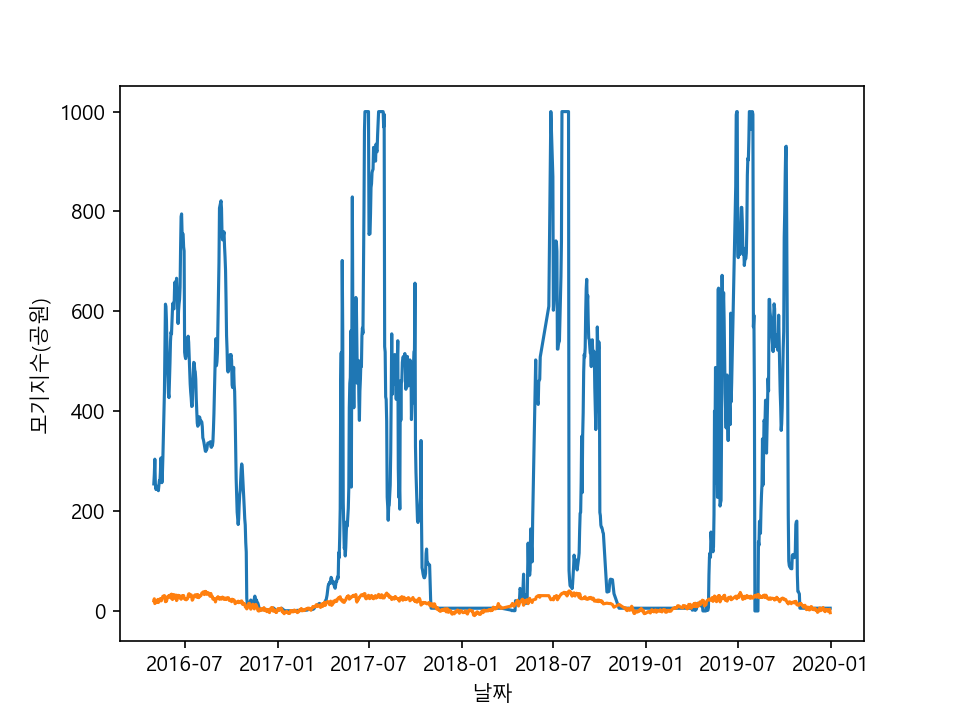

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>

In [51]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.lineplot(data=data, x="날짜",y="평균 지면온도(°C)")

In [52]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.lineplot(data=data, x="날짜",y="평균 전운량(1/10)")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>

In [53]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.lineplot(data=data, x="날짜",y="평균 풍속(m/s)")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>

<IPython.core.display.Javascript object>


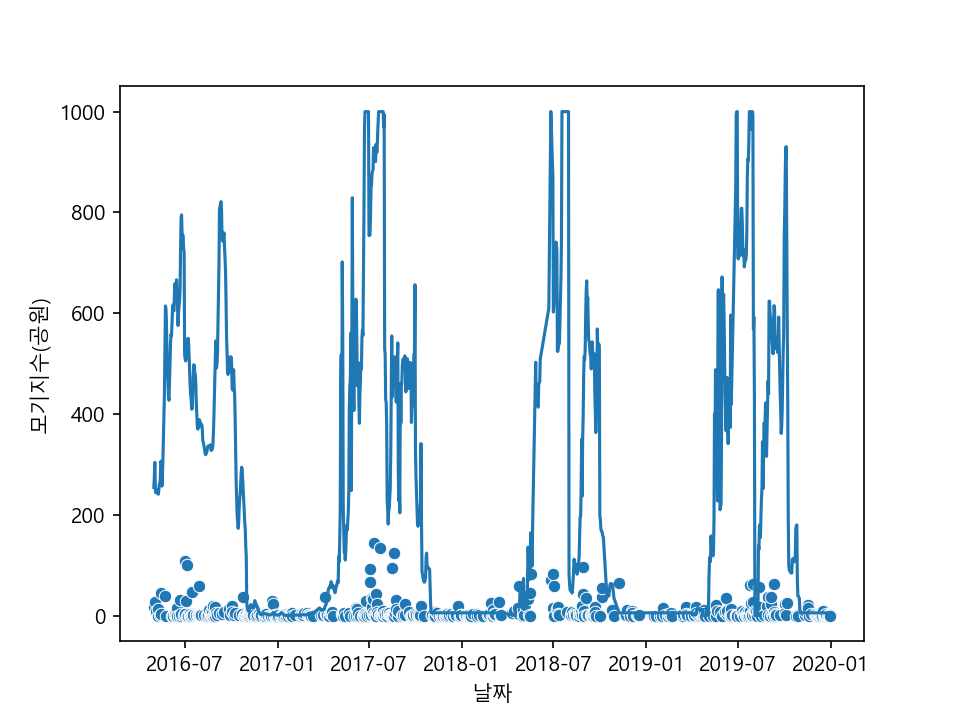

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>

In [54]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.scatterplot(data=data, x="날짜",y="일강수량(mm)")

In [56]:
sns.lineplot(data=data, x="날짜",y="모기지수(공원)")
sns.lineplot(data=data, x="날짜",y="미세먼지(㎍/㎥)")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='날짜', ylabel='모기지수(공원)'>